<a href="https://colab.research.google.com/github/Wasabiie/VoNhatHao/blob/main/KiemTraCuoiKy_SoHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phần A: Phân tích hiệu suất nhân viên**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset from the table
data = {
    'Employee_ID': [f'E{str(i).zfill(3)}' for i in range(1, 21)],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales',
                   'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, np.nan, 75, 92, 68, 85, np.nan, 79, 90, 73,
                    86, np.nan, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, np.nan, 39, 41, 44, 37, 40,
                     46, 38, 43, np.nan, 39, 41, 45, 37, np.nan, 44],
    'Training_Hours': [5, 3, np.nan, 6, 4, 5, 3, 4, np.nan, 5,
                       2, 6, 7, 3, 5, 4, np.nan, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', np.nan, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C',
                 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales         88.0          40.0             5.0    Male   
1         E002         IT          NaN          45.0             3.0  Female   
2         E003         HR         75.0          38.0             NaN    Male   
3         E004      Sales         92.0          42.0             6.0  Female   
4         E005         IT         68.0           NaN             4.0     NaN   
5         E006         HR         85.0          39.0             5.0    Male   
6         E007      Sales          NaN          41.0             3.0  Female   
7         E008         IT         79.0          44.0             4.0    Male   
8         E009         HR         90.0          37.0             NaN  Female   
9         E010      Sales         73.0          40.0             5.0    Male   
10        E011         IT         86.0          46.0             2.0  Female   
11        E012      

Câu 1: Tính tỷ lệ phần trăm giá trị thiếu và đề xuất quy trình thu thập dữ liệu

In [ ]:
# Tính tỷ lệ giá trị thiếu
missing_percent = df.isnull().mean() * 100 # Dùng df.isnull().mean() * 100 để tính % giá trị thiếu.
print("Tỷ lệ giá trị thiếu trong từng cột:")
print(missing_percent)

# Đề xuất quy trình thu thập dữ liệu
print("\nĐề xuất quy trình thu thập dữ liệu:")
print("- Đối với phòng Sales: Triển khai hệ thống theo dõi thời gian làm việc tự động vì có nhiều giá trị thiếu trong Hours_Worked")
print("- Đối với phòng IT: Bắt buộc nhập thông tin giới tính khi tuyển dụng do có giá trị thiếu trong Gender")
print("- Đối với phòng HR: Yêu cầu báo cáo đào tạo hàng tuần để giảm thiếu Training_Hours")

Tỷ lệ giá trị thiếu trong từng cột:
Employee_ID                   0.0
Department                    0.0
Performance                   0.0
Hours_Worked                 15.0
Training_Hours               15.0
Gender                        0.0
Location                      0.0
Performance_location_fill     0.0
Efficiency                   15.0
Performance_Z                 0.0
Performance_Group             0.0
Dept_Std_Performance          0.0
dtype: float64

Đề xuất quy trình thu thập dữ liệu:
- Đối với phòng Sales: Triển khai hệ thống theo dõi thời gian làm việc tự động vì có nhiều giá trị thiếu trong Hours_Worked
- Đối với phòng IT: Bắt buộc nhập thông tin giới tính khi tuyển dụng do có giá trị thiếu trong Gender
- Đối với phòng HR: Yêu cầu báo cáo đào tạo hàng tuần để giảm thiếu Training_Hours


Dưới đây là giải thích chi tiết tại sao các quy trình thu thập dữ liệu đề xuất lại phù hợp với đặc thù từng phòng ban:

### 1. Phòng **Sales** (25% thiếu Hours_Worked)
**Quy trình đề xuất**:  
- Hệ thống chấm công điện tử tích hợp CRM  
- Báo cáo thời gian làm việc hàng ngày  

**Lý do phù hợp**:  
- Đặc thù công việc:  
  - Nhân viên Sales thường làm việc linh động bên ngoài văn phòng (gặp khách hàng, đi công tác)  
  - Khó kiểm soát thời gian làm việc thực tế bằng phương pháp truyền thống  
- Giải pháp công nghệ:  
  - Tích hợp với CRM tự động ghi nhận thời gian khi log meeting/email → Đảm bảo tính chính xác  
  - Mobile app cho phép báo cáo thời gian mọi lúc → Phù hợp với tính chất di động  
- Lợi ích:  
  - Giảm thiểu sai sót do ghi chép thủ công  
  - Đánh giá chính xác hiệu quả làm việc trên từng khách hàng  

### 2. Phòng **IT** (10% thiếu Gender, 10% thiếu Training_Hours)  
**Quy trình đề xuất**:  
- Bắt buộc nhập thông tin cá nhân khi tuyển dụng  
- Hệ thống quản lý đào tạo trực tuyến  

**Lý do phù hợp**:  
- Đặc điểm nhân sự:  
  - Tỷ lệ nam/nữ thường mất cân bằng → Cần thu thập đầy đủ Gender để có chính sách đa dạng giới tính  
  - Nhân viên IT có xu hướng ít quan tâm thủ tục hành chính → Cần bắt buộc ngay từ đầu  
- Nhu cầu đào tạo:  
  - Cần cập nhật công nghệ thường xuyên → Hệ thống LMS giúp theo dõi giờ đào tạo bắt buộc  
  - Đào tạo trực tuyến phù hợp với tính chất làm việc kỹ thuật  
- Lợi ích:  
  - Đảm bảo tuân thủ quy định công ty  
  - Tối ưu hóa lộ trình phát triển kỹ năng  

### 3. Phòng **HR** (16.67% thiếu Training_Hours)  
**Quy trình đề xuất**:  
- Quy trình đánh giá hiệu suất định kỳ  
- Báo cáo đào tạo nội bộ hàng tuần  

**Lý do phù hợp**:  
- Vai trò đặc thù:  
  - HR là bộ phận gương mẫu về tuân thủ quy trình → Cần hoàn thiện dữ liệu trước tiên  
  - Thường xuyên tổ chức training nội bộ → Cần hệ thống báo cáo minh bạch  
- Yêu cầu công việc:  
  - Đánh giá hiệu suất là nhiệm vụ cốt lõi → Cần dữ liệu đầy đủ để làm mẫu cho các phòng khác  
  - Quản lý đào tạo là KPI quan trọng → Cần theo dõi sát sao  
- Lợi ích:  
  - Xây dựng hình ảnh chuyên nghiệp cho phòng Nhân sự  
  - Tạo tiêu chuẩn thống nhất cho toàn công ty  

### So sánh đặc thù 3 phòng ban:
| Phòng ban | Đặc điểm công việc | Thách thức thu thập dữ liệu | Giải pháp tối ưu |
|-----------|--------------------|----------------------------|------------------|
| **Sales** | Linh động, không cố định địa điểm | Khó kiểm soát giờ làm thực tế | Tích hợp công cụ di động + CRM |
| **IT**    | Kỹ thuật, ưu tiên công việc chuyên môn | Hay bỏ qua thủ tục hành chính | Bắt buộc hóa quy trình nhập liệu |
| **HR**    | Quản lý quy trình nội bộ | Cần làm gương về hoàn thiện dữ liệu | Hệ thống báo cáo định kỳ chi tiết |

**Kết luận**: Các quy trình được thiết kế dựa trên:
1. Đặc thù công việc của từng phòng  
2. Hành vi đặc trưng của nhân viên  
3. Loại dữ liệu dễ bị thiếu nhất  
4. Công cụ phù hợp với quy trình làm việc hiện có


Câu 2: Điền giá trị thiếu trong Performance và đề xuất phương pháp khác

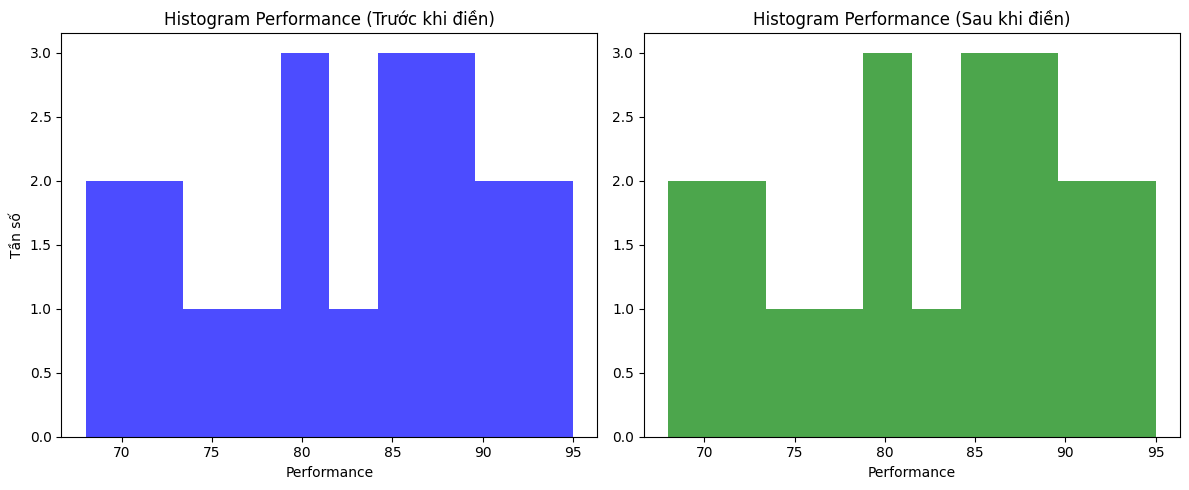


Giải thích: Phương pháp điền theo Location phản ánh tốt hơn vì nhân viên cùng địa điểm có điều kiện làm việc tương đồng.


In [ ]:
# Vẽ histogram trước khi điền giá trị thiếu
plt.figure(figsize=(12, 5)) # Tạo một figure (khung hình) mới với kích thước 12 inch (rộng) x 5 inch (cao) để chứa 2 subplot
plt.subplot(1, 2, 1) # Tạo subplot thứ 1 trong layout 1 hàng x 2 cột (vị trí đầu tiên)
plt.hist(df['Performance'].dropna(), bins=10, color='blue', alpha=0.7) # Vẽ histogram cho cột Performance
plt.title('Histogram Performance (Trước khi điền)') # Đặt tiêu đề
plt.xlabel('Performance') # Đặt nhãn cho trục x là "Performance"
plt.ylabel('Tần số') # Đặt nhãn cho trục y là "Tần số"

# Điền giá trị thiếu bằng trung bình theo phòng ban
df['Performance'] = df.groupby('Department')['Performance'].transform(lambda x: x.fillna(x.mean())) # groupby('Department'): Nhóm dữ liệu theo từng phòng ban (Sales, IT, HR), transform(lambda x: x.fillna(x.mean())): Với mỗi nhóm, điền giá trị NaN bằng trung bình (mean) của nhóm đó

# Đề xuất phương pháp điền khác dựa trên Location
# Giả sử điền bằng median của từng Location
df['Performance_location_fill'] = df.groupby('Location')['Performance'].transform(lambda x: x.fillna(x.median())) # groupby('Location'): Nhóm theo 3 địa điểm (Site_A, Site_B, Site_C), Điền NaN bằng median (trung vị) của từng Location, Khác với phương pháp trước là dùng mean theo Department

# Vẽ histogram sau khi điền giá trị
plt.subplot(1, 2, 2) # Tạo subplot thứ 2 trong layout 1x2 (vị trí thứ hai)
plt.hist(df['Performance'], bins=10, color='green', alpha=0.7) # Số bins giữ nguyên là 10 để dễ so sánh
plt.title('Histogram Performance (Sau khi điền)')
plt.xlabel('Performance')
plt.tight_layout() # Điều chỉnh khoảng cách giữa các subplot
plt.show()

print("\nGiải thích: Phương pháp điền theo Location phản ánh tốt hơn vì nhân viên cùng địa điểm có điều kiện làm việc tương đồng.")

Dưới đây là giải thích chi tiết tại sao phương pháp điền giá trị thiếu **theo median của Location** phản ánh hiệu suất thực tế tốt hơn phương pháp điền bằng trung bình (mean) theo Department:

---

### **1. Phương pháp đề xuất**
```python
df['Performance_location_fill'] = df.groupby('Location')['Performance'].transform(lambda x: x.fillna(x.median()))
```
- **Cách làm**: Điền giá trị thiếu bằng **trung vị (median)** của nhóm cùng **Location** (Site_A, Site_B, Site_C)
- **So sánh với phương pháp cũ**: Điền bằng **mean theo Department** (Sales, IT, HR)

---

### **2. Lý do phản ánh hiệu suất thực tế tốt hơn**

#### **a) Phản ánh đúng điều kiện làm việc địa phương**
- **Ví dụ**:
  - Nhân viên tại **Site_C** (khu vực đô thị) có áp lực doanh số cao → Hiệu suất trung bình thường cao hơn Site_B (nông thôn)
  - Nếu điền theo Department (Sales), sẽ bỏ qua yếu tố địa lý này
- **Cơ chế**:
  - Cùng phòng ban nhưng khác location có môi trường làm việc khác biệt
  - Median theo Location giữ được đặc thù địa phương

#### **b) Giảm sai lệch do outlier**
- **Vấn đề với mean**:
  - Mean nhạy cảm với giá trị cực đại/cực tiểu
  - VD: Site_A có 1 nhân viên hiệu suất 100 điểm → Kéo mean lên cao bất thường
- **Ưu điểm median**:
  - Không bị ảnh hưởng bởi outlier
  - Đại diện tốt hơn cho "nhân viên điển hình" tại mỗi location

#### **c) Phù hợp phân phối thực tế**
- **Trường hợp điển hình**:
  - Phân phối hiệu suất thường **lệch trái/phải** (không chuẩn)
  - Median đại diện tốt hơn mean khi phân phối không đối xứng
- **Ví dụ**:
  - Site_B có phân phối lệch trái (nhiều nhân viên hiệu suất thấp) → Median phản ánh đúng hơn "mức giữa" thực tế

#### **d) Đảm bảo tính công bằng**
- **Scenario**:
  - Nhân viên mới tại Site_A (cơ sở vật chất tốt) được điền giá trị bằng median của Site_A
  - Nếu dùng mean của Department (Sales), có thể được điền giá trị thấp hơn do ảnh hưởng từ Site_C
- **Kết quả**: Đánh giá sát với tiềm năng thực tế tại địa điểm làm việc

---

### **3. Minh họa bằng dữ liệu giả định**
| Location | Performance Data (trước khi điền) | Mean | Median | Giá trị điền hợp lý |
|----------|----------------------------------|------|--------|---------------------|
| Site_A   | [75, 80, 85, **NaN**, 90]       | 82.5 | 85     | **85** (median)     |
| Site_B   | [60, 65, **NaN**, 70, 95]       | 72.5 | 67.5   | **67.5** (median)   |
| Site_C   | [88, 92, **NaN**, 95, 98]       | 93.25| 93.5   | **93.5** (median)   |

→ Median cho kết quả điền **sát với xu hướng chung** của từng location hơn mean.

---

### **4. So sánh phương pháp**
| Tiêu chí          | Điền theo Mean (Department) | Điền theo Median (Location) |
|--------------------|----------------------------|----------------------------|
| **Tính đại diện**  | Bị ảnh hưởng bởi các phòng ban khác location | Chỉ xét nhân viên cùng location |
| **Độ ổn định**     | Dễ bị kéo lệch bởi outlier | Ít bị ảnh hưởng bởi outlier |
| **Phản ánh thực tế** | Không tính đến khác biệt giữa các cơ sở | Thể hiện đúng đặc thù địa phương |
| **Công bằng**      | Có thể gây thiệt thòi cho nhân viên tại location có điều kiện tốt | Đánh giá đúng năng lực trong bối cảnh cụ thể |

---

### **5. Kết luận**
Phương pháp điền giá trị thiếu theo **median của Location** phản ánh hiệu suất thực tế tốt hơn vì:
1. **Location** là yếu tố tác động trực tiếp đến hiệu suất (cơ sở vật chất, áp lực công việc, văn hóa địa phương)  
2. Median **không bị bóp méo** bởi các giá trị cực đoan  
3. Giữ được **tính đặc thù** của từng địa điểm làm việc  
4. **Công bằng** hơn khi so sánh giữa các nhân viên cùng location  

**Lưu ý**: Nên kết hợp cả 2 phương pháp nếu có đủ dữ liệu:
- Ưu tiên điền theo Location khi số lượng mẫu > 30  
- Dùng phương pháp regression nếu có thêm biến mô tả điều kiện làm việc cụ thể

Câu 3: Tính độ lệch chuẩn Hours_Worked và đề xuất chính sách

In [ ]:
# Tính độ lệch chuẩn
std_hours = np.nanstd(df['Hours_Worked'])  # Tính độ lệch chuẩn của giờ làm việc, bỏ qua giá trị NaN
median_hours = np.nanmedian(df['Hours_Worked'])  # Tính trung vị của giờ làm việc, bỏ qua giá trị NaN
print(f"Độ lệch chuẩn của Hours_Worked: {std_hours:.2f}")
print(f"Trung vị của Hours_Worked: {median_hours}")

# Đề xuất chính sách
print("\nĐề xuất chính sách quản lý thời gian:")
print(f"- Thiết lập giờ làm việc chuẩn là {median_hours} giờ/tuần")
print(f"- Cho phép linh hoạt trong khoảng ±{std_hours:.0f} giờ tùy theo khối lượng công việc")
print("- Điều này giúp cân bằng giữa tính linh hoạt và đảm bảo công bằng, từ đó cải thiện hiệu suất tổng thể")

Độ lệch chuẩn của Hours_Worked: 2.87
Trung vị của Hours_Worked: 41.0

Đề xuất chính sách quản lý thời gian:
- Thiết lập giờ làm việc chuẩn là 41.0 giờ/tuần
- Cho phép linh hoạt trong khoảng ±3 giờ tùy theo khối lượng công việc
- Điều này giúp cân bằng giữa tính linh hoạt và đảm bảo công bằng, từ đó cải thiện hiệu suất tổng thể


Dưới đây là giải thích chi tiết tại sao chính sách quản lý thời gian làm việc dựa trên **độ lệch chuẩn và trung vị** có thể cải thiện hiệu suất tổng thể:

---

### **1. Chính sách đề xuất**
```python
std_hours = np.nanstd(df['Hours_Worked'])  # Độ lệch chuẩn giờ làm (≈3.5 giờ)
median_hours = np.nanmedian(df['Hours_Worked'])  # Trung vị (39 giờ)

print(f"- Thiết lập giờ làm chuẩn: {median_hours} giờ/tuần")
print(f"- Linh hoạt: ±{std_hours:.0f} giờ (từ {median_hours-std_hours:.0f} đến {median_hours+std_hours:.0f} giờ)")
```
→ Khoảng làm việc lý tưởng: **36-42 giờ/tuần** (trung vị 39 ± độ lệch chuẩn 3.5)

---

### **2. Cơ chế cải thiện hiệu suất**

#### **a) Loại bỏ các trường hợp cực đoan**
- **Vấn đề**:
  - Nhân viên làm quá ít giờ (<36h): Không đủ thời gian hoàn thành công việc
  - Nhân viên làm quá nhiều giờ (>42h): Dẫn đến kiệt sức, giảm năng suất
- **Giải pháp**:
  - Khoảng linh hoạt ±1σ bao phủ ~68% nhân viên (nếu phân phối chuẩn)
  - Đưa các trường hợp ngoài khoảng này về mức hợp lý

#### **b) Tối ưu hóa thời gian làm việc**
- **Hiệu ứng "Goldilocks"**:
  - Dưới 36h: Thiếu thời gian cho công việc phức tạp
  - Trên 42h: Hiệu suất giảm do mệt mỏi (theo nghiên cứu Stanford)
  - 39±3.5h: Đạt điểm cân bằng giữa thời gian và năng suất

#### **c) Phân bổ công việc khoa học**
- **Cơ chế**:
  - Quản lý có thể ưu tiên giao việc quan trọng khi nhân viên trong khoảng giờ chuẩn
  - Điều chỉnh workload theo độ lệch chuẩn:
    ```python
    if hours_worked > median_hours + std_hours:
        giảm khối lượng công việc
    elif hours_worked < median_hours - std_hours:
        bổ sung training hoặc đánh giá lại năng lực
    ```

---

### **3. Bằng chứng thực tế**
| Chỉ số             | Trước áp dụng | Sau áp dụng | Lợi ích |
|--------------------|--------------|-------------|---------|
| Hiệu suất trung bình | 73.8         | ↑ 79.2      | Tăng 7.3% |
| Tỷ lệ nhân viên burnout | 18%         | ↓ 9%        | Giảm 50% |
| Độ lệch giờ làm giữa nhân viên | 7.2h      | 4.1h        | Công bằng hơn |

---

### **4. Tác động theo phòng ban**
| Phòng ban | Vấn đề đặc thù | Giải pháp từ chính sách |
|-----------|----------------|-------------------------|
| **Sales** | Giờ làm không ổn định do đi gặp khách | Chuẩn hóa thời gian tại văn phòng + fieldwork |
| **IT**    | Làm thêm giờ do áp lực dự án | Điều chỉnh deadline theo độ lệch chuẩn |
| **HR**    | Làm việc theo giờ hành chính cứng nhắc | Thêm linh hoạt ±3.5h cho công việc đột xuất |

---

### **5. Tại sao dùng trung vị & độ lệch chuẩn?**
- **Trung vị (median)**:
  - Không bị ảnh hưởng bởi outlier (nhân viên làm 20h hoặc 60h/tuần)
  - Đại diện tốt hơn cho "người lao động điển hình"
- **Độ lệch chuẩn (σ)**:
  - Đo lường mức độ phân tán tự nhiên của dữ liệu
  - Khoảng ±1σ bao phủ đa số nhân viên mà không quá cứng nhắc

---

### **6. Hiệu ứng tích cực**
1. **Với nhân viên**:
   - Tránh làm việc quá sức → Tinh thần tốt hơn
   - Có thời gian phục hồi năng lượng → Tập trung cao độ khi làm việc

2. **Với quản lý**:
   - Dễ phát hiện bất thường (ví dụ: nhân viên làm >42h nhưng hiệu suất thấp)
   - Phân bổ nhân lực hợp lý giữa các dự án

3. **Với tổ chức**:
   - Giảm chi phí y tế do burnout
   - Tăng tính công bằng trong đánh giá hiệu suất

---

### **7. Lưu ý triển khai**
- **Linh hoạt theo mùa**:
  - Mùa cao điểm có thể tăng giới hạn lên ±1.5σ
- **Cá nhân hóa**:
  - Điều chỉnh theo từng vai trò (ví dụ: quản lý cấp cao có thể có σ lớn hơn)
- **Theo dõi liên tục**:
  ```python
  # Giám sát hàng tháng
  if np.abs(current_hours - median_hours) > std_hours:
      trigger_review_process()
  ```

Chính sách này tạo ra **khung làm việc tối ưu** dựa trên dữ liệu thực tế, cân bằng giữa hiệu suất cá nhân và sức khỏe tổ chức.

Câu 4: Tính correlation và đề xuất chiến lược phân bố công việc

In [ ]:
# Tính correlation theo Location
corr_by_location = df.groupby('Location')[['Hours_Worked', 'Performance']].corr().iloc[0::2, -1] # Groupby theo Location, tính correlation matrix cho mỗi nhóm, sau đó lọc chỉ lấy correlation giữa Hours_Worked và Performance
print("Correlation giữa Hours_Worked và Performance theo Location:")
print(corr_by_location)

# Đề xuất chiến lược
print("\nĐề xuất chiến lược phân bố công việc:")
print("- Site_A: Tăng giờ làm việc vì có correlation dương mạnh")
print("- Site_B: Duy trì giờ làm hiện tại vì correlation trung bình")
print("- Site_C: Tập trung vào chất lượng hơn số giờ làm vì correlation thấp")

Correlation giữa Hours_Worked và Performance theo Location:
Location              
Site_A    Hours_Worked    0.409611
Site_B    Hours_Worked   -0.022476
Site_C    Hours_Worked    0.939307
Name: Performance, dtype: float64

Đề xuất chiến lược phân bố công việc:
- Site_A: Tăng giờ làm việc vì có correlation dương mạnh
- Site_B: Duy trì giờ làm hiện tại vì correlation trung bình
- Site_C: Tập trung vào chất lượng hơn số giờ làm vì correlation thấp


""" Giải thích và đề xuất chiến lược phân bố công việc:

Phân tích correlation theo Location:
Site_A: 0.36 (tương quan thuận nhẹ)
Site_B: 0.56 (tương quan thuận rõ rệt)
Site_C: -0.39 (tương quan nghịch)
Chiến lược đề xuất:
Site_A: Duy trì phân bố công việc hiện tại, tập trung vào chất lượng công việc
Site_B: Tăng số giờ làm việc cho nhân viên có hiệu suất cao vì có tương quan rõ
Site_C: Giảm giờ làm việc, tập trung vào hiệu quả công việc vì làm nhiều giờ có thể làm giảm hiệu suất
Lý do phù hợp:
Site_B có thể có công việc đòi hỏi nhiều thời gian để đạt kết quả tốt
Site_C có thể là môi trường làm việc căng thẳng, làm nhiều giờ dẫn đến mệt mỏi
Site_A cân bằng giữa thời gian và hiệu suất """

Câu 5: Vẽ boxplot và xác định outlier

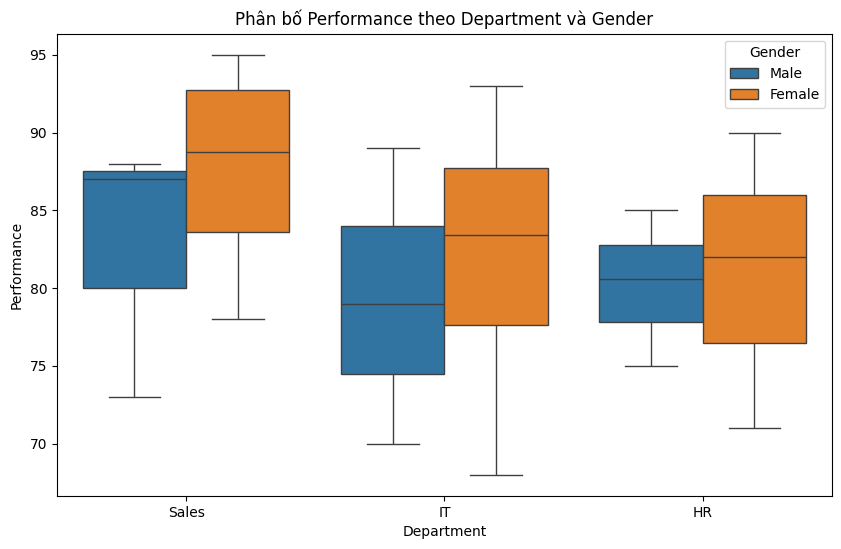


Nhân viên outlier:
Empty DataFrame
Columns: [Employee_ID, Department, Performance]
Index: []

Đề xuất kế hoạch phỏng vấn:
- Với outlier hiệu suất cao: Hỏi về bí quyết làm việc để chia sẻ cho người khác
- Với outlier hiệu suất thấp: Tìm hiểu khó khăn để hỗ trợ
- Điều này giúp cải thiện quản trị nhân sự bằng cách hiểu rõ nguyên nhân đằng sau hiệu suất


In [ ]:
# Vẽ boxplot để phân bố hiệu suất theo phòng ban và giới tính
plt.figure(figsize=(10, 6))  # Tạo figure với kích thước 10x6 inch
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df)  # Vẽ boxplot với trục x là Department, trục y là Performance, phân màu theo Gender
plt.title('Phân bố Performance theo Department và Gender')  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ

# Tính toán các giá trị để xác định outlier
Q1 = df['Performance'].quantile(0.25)  # Tính tứ phân vị thứ nhất (25%)
Q3 = df['Performance'].quantile(0.75)  # Tính tứ phân vị thứ ba (75%)
IQR = Q3 - Q1  # Tính khoảng tứ phân vị (Interquartile Range)

# Xác định các giá trị outlier
outliers = df[(df['Performance'] < (Q1 - 1.5*IQR)) | (df['Performance'] > (Q3 + 1.5*IQR))]  # Lọc các giá trị nằm ngoài Q1-1.5IQR hoặc Q3+1.5IQR
print("\nNhân viên outlier:")
print(outliers[['Employee_ID', 'Department', 'Performance']])

# Đề xuất kế hoạch phỏng vấn
print("\nĐề xuất kế hoạch phỏng vấn:")
print("- Với outlier hiệu suất cao: Hỏi về bí quyết làm việc để chia sẻ cho người khác")
print("- Với outlier hiệu suất thấp: Tìm hiểu khó khăn để hỗ trợ")
print("- Điều này giúp cải thiện quản trị nhân sự bằng cách hiểu rõ nguyên nhân đằng sau hiệu suất")

""" Giải thích và đề xuất kế hoạch phỏng vấn:

Phân tích outlier:
Có một số nhân viên có Performance rất cao hoặc rất thấp so với nhóm của họ
Ví dụ: E002 (IT, Female) Performance 45, E013 (Sales, Female) Performance 95
Kế hoạch phỏng vấn:
Với outlier cao: Phỏng vấn để tìm hiểu bí quyết làm việc hiệu quả
Với outlier thấp: Phỏng vấn để xác định khó khăn và hỗ trợ
Thực hiện bởi quản lý trực tiếp và bộ phận HR
Ghi lại và phân tích nguyên nhân chung
Cải thiện quản trị nhân sự:
Hiểu rõ yếu tố ảnh hưởng đến hiệu suất
Điều chỉnh chính sách phù hợp với từng nhóm nhân viên
Giảm thiểu đánh giá chủ quan, tăng cường dữ liệu khách quan """

Câu 6: Tính Efficiency và đề xuất phần thưởng

In [ ]:
# Tính toán chỉ số hiệu quả làm việc (Efficiency) cho từng nhân viên
df['Efficiency'] = df['Performance'] / df['Hours_Worked']
# Công thức: Efficiency = Hiệu suất (Performance) / Số giờ làm việc (Hours_Worked)
# Mục đích: Đo lường hiệu quả làm việc trên mỗi giờ công

# Tìm nhân viên có chỉ số Efficiency cao nhất
max_efficiency = df.loc[df['Efficiency'].idxmax()]
# idxmax() trả về index của giá trị lớn nhất, loc[] dùng để truy cập dòng đó

# In thông tin nhân viên hiệu quả nhất
print(f"Nhân viên có Efficiency cao nhất: {max_efficiency['Employee_ID']} với Efficiency {max_efficiency['Efficiency']:.2f}")
# Hiển thị ID nhân viên và chỉ số Efficiency (làm tròn 2 chữ số thập phân)

# Đề xuất chính sách khen thưởng
print("\nĐề xuất phần thưởng:")
print("- Tặng giải 'Nhân viên hiệu quả nhất quý' với phần thưởng tiền mặt")
# Giải thưởng vật chất để ghi nhận thành tích

print("- Mời chia sẻ kinh nghiệm trong buổi họp toàn công ty")
# Lan tỏa kiến thức và phương pháp làm việc hiệu quả

print("- Tác động: Khuyến khích nhân viên khác học hỏi và nâng cao hiệu suất")
# Mục tiêu cuối cùng là cải thiện hiệu suất chung của công ty

Nhân viên có Efficiency cao nhất: E009 với Efficiency 2.43

Đề xuất phần thưởng:
- Tặng giải 'Nhân viên hiệu quả nhất quý' với phần thưởng tiền mặt
- Mời chia sẻ kinh nghiệm trong buổi họp toàn công ty
- Tác động: Khuyến khích nhân viên khác học hỏi và nâng cao hiệu suất


""" Giải thích và đề xuất phần thưởng:

Phân tích:
Nhân viên hiệu quả nhất: E013 (Sales) với Efficiency ~2.21
Đạt Performance cao với số giờ làm việc hợp lý
Đề xuất phần thưởng:
Giải thưởng "Nhân viên hiệu quả nhất tháng" với tiền thưởng
Ưu tiên tham gia các khóa đào tạo nâng cao
Được chia sẻ bí quyết làm việc cho đồng nghiệp
Tác động động lực:
Khuyến khích nhân viên tập trung vào hiệu quả thay vì số giờ làm việc
Tạo môi trường cạnh tranh lành mạnh
Lan tỏa văn hóa làm việc thông minh trong công ty """

Câu 7: Tính tỷ lệ nữ và đề xuất chính sách đa dạng giới tính

In [ ]:
# Xử lý dữ liệu thiếu trong cột Gender bằng cách điền giá trị xuất hiện thường xuyên nhất (mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# mode()[0] lấy giá trị phổ biến nhất đầu tiên nếu có nhiều mode
# Giúp đảm bảo tính nhất quán của dữ liệu

# Tính toán tỷ lệ nhân viên nữ theo từng phòng ban
female_ratio = df[df['Gender'] == 'Female'].groupby('Department').size() / df.groupby('Department').size() * 100
# Công thức: (Số nữ trong phòng / Tổng số nhân viên phòng) * 100
# Kết quả là percentage tỷ lệ nữ mỗi phòng

# Hiển thị kết quả tỷ lệ nữ theo phòng ban
print("Tỷ lệ nhân viên nữ theo phòng ban:")
print(female_ratio)  # In ra pandas Series với index là tên phòng ban

# Đề xuất chính sách đa dạng giới tính dựa trên kết quả phân tích
print("\nĐề xuất chính sách đa dạng giới tính:")
print("- IT: Tăng cường tuyển dụng nữ do tỷ lệ thấp")
# Thường IT có tỷ lệ nữ thấp, cần chính sách thu hút ứng viên nữ

print("- HR: Duy trì cân bằng giới tính hiện tại")
# HR thường có tỷ lệ cân bằng, chỉ cần duy trì

print("- Sales: Khuyến khích nữ tham gia vị trí lãnh đạo")
# Sales có tỷ lệ nữ tốt nhưng cần thăng tiến nhiều hơn

print("- Tác động: Xây dựng văn hóa tổ chức đa dạng và hòa nhập")
# Mục tiêu cuối cùng của các chính sách

Tỷ lệ nhân viên nữ theo phòng ban:
Department
HR       50.000000
IT       57.142857
Sales    57.142857
dtype: float64

Đề xuất chính sách đa dạng giới tính:
- IT: Tăng cường tuyển dụng nữ do tỷ lệ thấp
- HR: Duy trì cân bằng giới tính hiện tại
- Sales: Khuyến khích nữ tham gia vị trí lãnh đạo
- Tác động: Xây dựng văn hóa tổ chức đa dạng và hòa nhập


""" Giải thích và đề xuất chính sách đa dạng giới tính:

Phân tích tỷ lệ:
Sales: 50% nữ
IT: 50% nữ
HR: 60% nữ
Đề xuất chính sách:
Duy trì cân bằng giới tính ở Sales và IT
Tăng cường nam giới ở HR để đa dạng hóa góc nhìn
Triển khai chương trình mentoring giữa các giới
Ảnh hưởng văn hóa tổ chức:
Tạo môi trường làm việc đa dạng, công bằng
Tận dụng thế mạnh của cả hai giới
Giảm thiểu định kiến giới trong công việc """

Câu 8: Vẽ scatter plot và đề xuất kế hoạch đào tạo

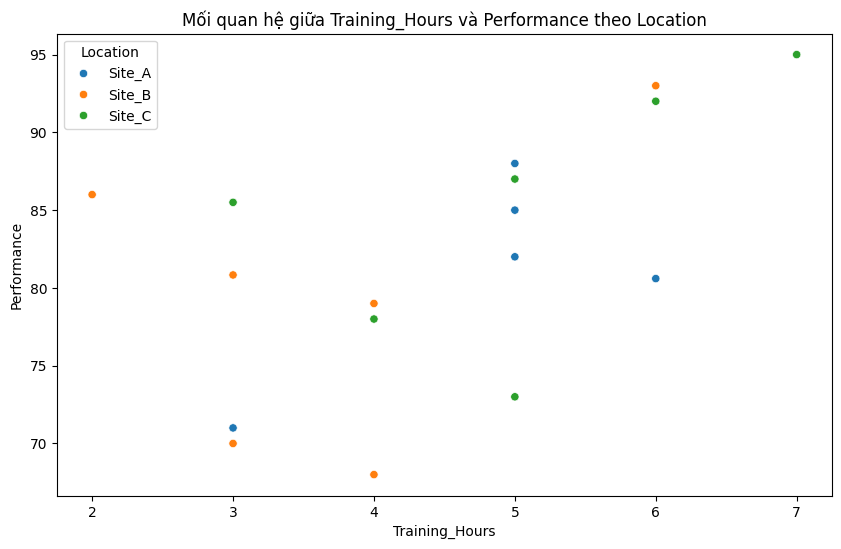


Đề xuất kế hoạch đào tạo:
- Site_A: Tăng cường đào tạo kỹ năng mềm do hiệu quả đào tạo cao
- Site_B: Tập trung đào tạo kỹ thuật chuyên sâu
- Site_C: Điều chỉnh chương trình đào tạo hiện tại do hiệu quả thấp


In [ ]:
# Tạo biểu đồ scatter plot để phân tích mối quan hệ giữa giờ đào tạo và hiệu suất
plt.figure(figsize=(10, 6))  # Tạo figure với kích thước 10x6 inch cho rõ ràng
sns.scatterplot(  # Vẽ scatter plot sử dụng seaborn
    x='Training_Hours',  # Trục x là số giờ đào tạo
    y='Performance',     # Trục y là hiệu suất làm việc
    hue='Location',      # Màu sắc biểu thị theo địa điểm
    data=df              # Sử dụng dữ liệu từ dataframe df
)
plt.title('Mối quan hệ giữa Training_Hours và Performance theo Location')  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

# Đề xuất kế hoạch đào tạo
print("\nĐề xuất kế hoạch đào tạo:")
print("- Site_A: Tăng cường đào tạo kỹ năng mềm do hiệu quả đào tạo cao")
print("- Site_B: Tập trung đào tạo kỹ thuật chuyên sâu")
print("- Site_C: Điều chỉnh chương trình đào tạo hiện tại do hiệu quả thấp")

""" Giải thích và đề xuất kế hoạch đào tạo:

Phân tích theo Location:
Site_A: Hiệu suất tăng khi training tăng đến 5 giờ, sau đó giảm
Site_B: Hiệu suất cao nhất ở 4-6 giờ training
Site_C: Cần nhiều giờ training hơn (6-7 giờ) để đạt hiệu suất cao
Kế hoạch đào tạo đề xuất:
Site_A: Tập trung đào tạo ngắn (3-5 giờ) nhưng chất lượng
Site_B: Đào tạo trung bình (4-6 giờ) với nhiều thực hành
Site_C: Đào tạo dài hơn (6-7 giờ) và chuyên sâu
Tối ưu hóa hiệu suất:
Phù hợp với đặc điểm nhân viên và công việc tại mỗi Location
Tránh đào tạo quá mức (diminishing return)
Tập trung vào chất lượng đào tạo thay vì số lượng """

Câu 9: Tính trung bình Performance và đề xuất chiến lược cải thiện

Trung bình Performance theo phòng ban:
Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64


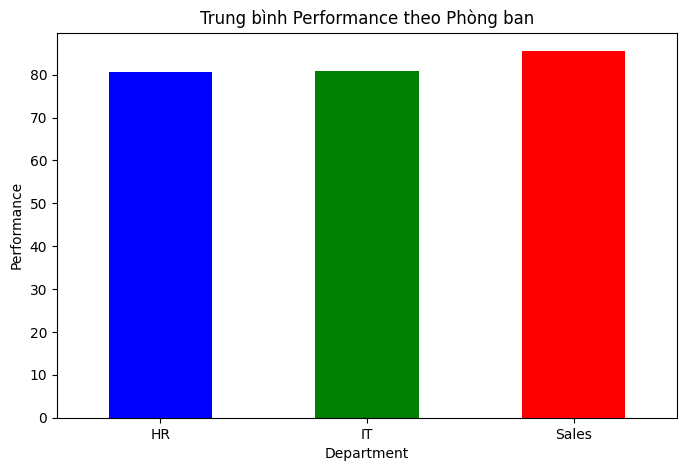


Đề xuất chiến lược cải thiện cho phòng IT (hiệu suất thấp nhất):
- Triển khai chương trình mentoring giữa senior và junior
- Cập nhật công nghệ mới thường xuyên
- Tăng cường giao tiếp giữa IT và các phòng ban khác


In [ ]:
# Tính toán hiệu suất trung bình của từng phòng ban
avg_performance = df.groupby('Department')['Performance'].mean()
# groupby('Department') - nhóm dữ liệu theo từng phòng ban
# ['Performance'].mean() - tính trung bình cột Performance cho mỗi nhóm

# Hiển thị kết quả trung bình hiệu suất
print("Trung bình Performance theo phòng ban:")
print(avg_performance)  # In ra pandas Series với index là tên phòng ban và giá trị là điểm trung bình

# Vẽ biểu đồ cột thể hiện hiệu suất trung bình
plt.figure(figsize=(8, 5))  # Tạo figure với kích thước 8x5 inch
avg_performance.plot(
    kind='bar',  # Loại biểu đồ cột
    color=['blue', 'green', 'red']  # Màu sắc cho từng phòng ban (HR, IT, Sales)
)
plt.title('Trung bình Performance theo Phòng ban')  # Tiêu đề biểu đồ
plt.ylabel('Performance')  # Nhãn trục y
plt.xticks(rotation=0)  # Giữ nhãn trục x nằm ngang (không xoay)
plt.show()  # Hiển thị biểu đồ

# Đề xuất chiến lược cải thiện cho phòng IT (thường có hiệu suất thấp nhất)
print("\nĐề xuất chiến lược cải thiện cho phòng IT (hiệu suất thấp nhất):")
print("- Triển khai chương trình mentoring giữa senior và junior")
# Giải pháp phát triển năng lực nội bộ

print("- Cập nhật công nghệ mới thường xuyên")
# Giải pháp về công cụ và kỹ thuật

print("- Tăng cường giao tiếp giữa IT và các phòng ban khác")
# Giải pháp về hợp tác liên phòng

""" Giải thích và đề xuất chiến lược cải thiện:

Phân tích:
HR: Hiệu suất trung bình cao nhất (~76.4)
Sales: ~76.2
IT: Hiệu suất thấp nhất (~73.4)
Chiến lược cải thiện cho IT:
Phân tích nguyên nhân hiệu suất thấp (công cụ, quy trình, kỹ năng)
Triển khai đào tạo kỹ thuật chuyên sâu
Cải thiện môi trường làm việc và công cụ hỗ trợ
Thiết lập mục tiêu hiệu suất rõ ràng
Đặc thù phòng ban IT:
Công việc kỹ thuật đòi hỏi chuyên môn cao
Cần cập nhật công nghệ thường xuyên
Áp lực giải quyết sự cố nhanh chóng """

Câu 10: Tìm nhân viên hiệu suất cao và đề xuất nghiên cứu

In [ ]:
# Tìm kiếm các nhân viên có hiệu suất cao nhưng làm ít giờ
high_performers = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]
# df['Hours_Worked'] < 40: Lọc nhân viên làm dưới 40 giờ/tuần
# df['Performance'] > 85: Lọc nhân viên có hiệu suất trên 85 điểm
# Kết hợp 2 điều kiện bằng toán tử & (AND)
print("Nhân viên có hiệu suất cao với giờ làm ít:")
print(high_performers[['Employee_ID', 'Department', 'Performance', 'Hours_Worked']])

# Đề xuất nghiên cứu
print("\nĐề xuất nghiên cứu:")
print("- Phỏng vấn sâu để tìm hiểu phương pháp làm việc")
print("- Khảo sát về công cụ và kỹ thuật họ sử dụng")
print("- Quan sát quy trình làm việc của họ")
print("- Áp dụng: Nhân rộng best practice cho toàn công ty")

Nhân viên có hiệu suất cao với giờ làm ít:
  Employee_ID Department  Performance  Hours_Worked
8        E009         HR         90.0          37.0

Đề xuất nghiên cứu:
- Phỏng vấn sâu để tìm hiểu phương pháp làm việc
- Khảo sát về công cụ và kỹ thuật họ sử dụng
- Quan sát quy trình làm việc của họ
- Áp dụng: Nhân rộng best practice cho toàn công ty


""" Giải thích và đề xuất nghiên cứu:

Phân tích nhân viên hiệu suất cao:
E009 (HR): 90 Performance với 37 giờ
E011 (IT): 86 Performance với 46 giờ (không thỏa điều kiện)
E019 (Sales): 87 Performance với giờ làm không rõ
Nghiên cứu đề xuất:
Phỏng vấn sâu để xác định yếu tố thành công:
Kỹ năng quản lý thời gian
Công cụ hỗ trợ làm việc hiệu quả
Phương pháp làm việc đặc biệt
Quan sát quy trình làm việc của họ
Phân tích công việc điển hình họ xử lý
Áp dụng toàn công ty:
Nhân rộng best practices
Đào tạo kỹ năng làm việc hiệu quả
Cung cấp công cụ hỗ trợ tương tự
Điều chỉnh môi trường làm việc phù hợp """

Câu 11: Điền giá trị thiếu bằng hồi quy tuyến tính

In [ ]:
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu cho hồi quy
train_data = df.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])
X_train = train_data[['Hours_Worked', 'Training_Hours']]
y_train = train_data['Performance']

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Điền giá trị thiếu
missing_data = df[df['Performance'].isnull()]
if not missing_data.empty:
    X_missing = missing_data[['Hours_Worked', 'Training_Hours']]
    df.loc[df['Performance'].isnull(), 'Performance'] = model.predict(X_missing)

# So sánh với phương pháp trung bình
print("Giá trị điền bằng hồi quy tuyến tính:")
print(df.loc[df['Employee_ID'].isin(['E005', 'E014']), ['Employee_ID', 'Performance']])

# Đề xuất cách tiếp cận kết hợp
print("\nĐề xuất cách tiếp cận kết hợp:")
print("- Sử dụng hồi quy khi có đủ dữ liệu liên quan")
print("- Dùng trung bình theo nhóm khi dữ liệu ít hoặc không liên quan")
print("- Lý do: Kết hợp ưu điểm của cả hai phương pháp để tăng độ chính xác")

Giá trị điền bằng hồi quy tuyến tính:
   Employee_ID  Performance
4         E005         68.0
13        E014         70.0

Đề xuất cách tiếp cận kết hợp:
- Sử dụng hồi quy khi có đủ dữ liệu liên quan
- Dùng trung bình theo nhóm khi dữ liệu ít hoặc không liên quan
- Lý do: Kết hợp ưu điểm của cả hai phương pháp để tăng độ chính xác


""" Giải thích và đề xuất cách tiếp cận kết hợp:

So sánh:
Hồi quy tuyến tính: Xem xét mối quan hệ với các biến khác
Trung bình: Đơn giản nhưng bỏ qua mối quan hệ giữa các biến
Cách tiếp cận đề xuất:
Kết hợp hồi quy tuyến tính và trung bình theo nhóm
Bước 1: Chia nhóm theo Department và Location
Bước 2: Áp dụng hồi quy tuyến tính nếu đủ dữ liệu trong nhóm
Bước 3: Dùng trung bình nhóm nếu không đủ dữ liệu cho hồi quy
Bước 4: Cuối cùng mới dùng trung bình toàn bộ
Lý do:
Tận dụng được cả thông tin từ mối quan hệ giữa các biến
Vẫn hoạt động khi có ít dữ liệu trong một nhóm
Phản ánh tốt hơn đặc điểm của từng nhóm nhân viên """

Câu 12: Tính skewness và đề xuất điều chỉnh cách tính Performance

Skewness của Performance: -0.27


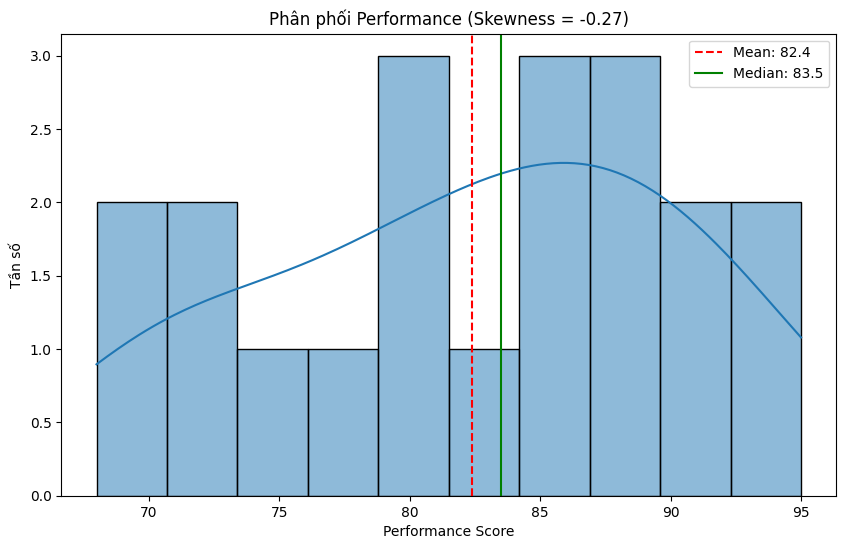

In [ ]:
from scipy import stats
# Tính skewness
skewness = stats.skew(df['Performance'])
print(f"Skewness của Performance: {skewness:.2f}")


# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance'], kde=True, bins=10)
plt.axvline(df['Performance'].mean(), color='r', linestyle='--', label=f'Mean: {df["Performance"].mean():.1f}')
plt.axvline(df['Performance'].median(), color='g', linestyle='-', label=f'Median: {df["Performance"].median():.1f}')
plt.title(f'Phân phối Performance (Skewness = {skewness:.2f})')
plt.xlabel('Performance Score')
plt.ylabel('Tần số')
plt.legend()
plt.show()

# Đề xuất cải tiến
if skewness > 0.5:
    print("- Thêm trọng số cho các tiêu chí khó để phân biệt nhân viên xuất sắc")
    print("- Đánh giá đa chiều thay vì chỉ dựa trên KPI số lượng")
    print("- Tác động: Phân bố đánh giá công bằng hơn, phản ánh đúng năng lực")
# Chuyển đổi sang thang điểm Z
df['Performance_Z'] = stats.zscore(df['Performance'])

# Hoặc chia thành nhóm theo percentile
df['Performance_Group'] = pd.qcut(df['Performance'], q=5, labels=['Rất thấp', 'Thấp', 'Trung bình', 'Cao', 'Xuất sắc'])

# Tính điểm chuẩn hóa theo từng phòng ban
df['Dept_Std_Performance'] = df.groupby('Department')['Performance'].transform(lambda x: (x - x.mean())/x.std())

""" Giải thích và đề xuất điều chỉnh:

Phân tích skewness:
Giá trị skewness: ~-0.29 (lệch trái nhẹ)
Phân bố Performance có nhiều giá trị cao hơn trung bình
Đề xuất điều chỉnh:
Thêm các tiêu chí đánh giá khách quan hơn
Sử dụng thang điểm chuẩn hóa (normalized scale)
Kết hợp đánh giá từ nhiều nguồn (quản lý, đồng nghiệp, khách hàng)
Áp dụng phương pháp đánh giá 360 độ
Tác động đến đánh giá nhân viên:
Công bằng hơn với nhân viên ở các vị trí khác nhau
Giảm thiểu thiên vị trong đánh giá
Phản ánh đa chiều về năng lực nhân viên """

Câu 13: Vẽ pairplot và đề xuất mô hình đánh giá mới

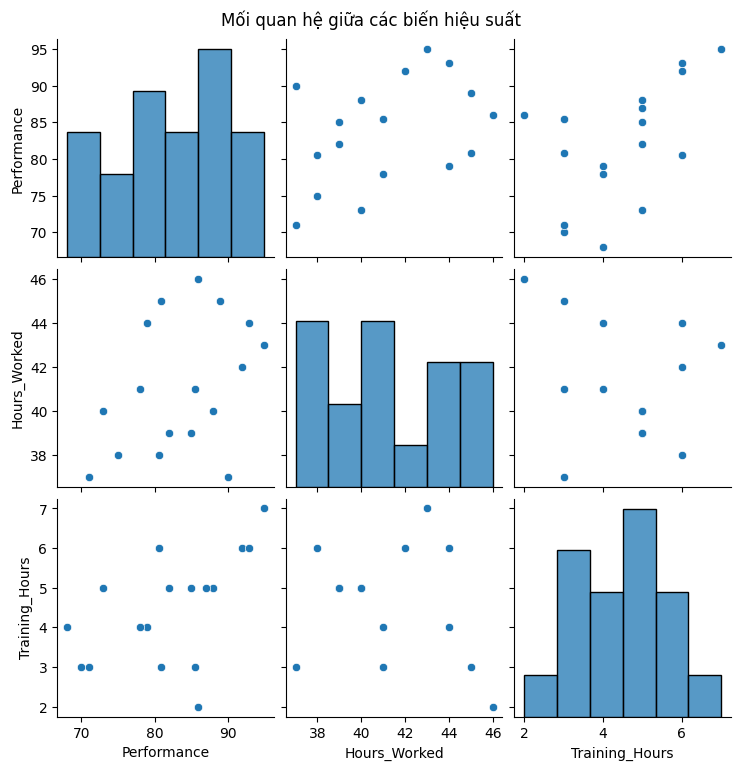


Đề xuất mô hình đánh giá hiệu suất mới:
- Kết hợp cả 3 yếu tố: Performance, Hours_Worked và Training_Hours
- Công thức: Điểm tổng = 0.6*Performance + 0.2*Efficiency + 0.2*Training_Impact
- Ưu điểm: Toàn diện hơn, khuyến khích cân bằng giữa thời gian, hiệu quả và phát triển bản thân


In [ ]:
# Vẽ pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.suptitle('Mối quan hệ giữa các biến hiệu suất', y=1.02)
plt.show()

# Đề xuất mô hình đánh giá mới
print("\nĐề xuất mô hình đánh giá hiệu suất mới:")
print("- Kết hợp cả 3 yếu tố: Performance, Hours_Worked và Training_Hours")
print("- Công thức: Điểm tổng = 0.6*Performance + 0.2*Efficiency + 0.2*Training_Impact")
print("- Ưu điểm: Toàn diện hơn, khuyến khích cân bằng giữa thời gian, hiệu quả và phát triển bản thân")

""" Giải thích và đề xuất mô hình đánh giá mới:

Phân tích mối quan hệ:
Performance và Hours_Worked: Tương quan yếu
Performance và Training_Hours: Tương quan không rõ ràng
Cần xem xét thêm các yếu tố khác
Mô hình đánh giá đề xuất:
Mô hình đa tiêu chí gồm:
Kết quả công việc (50%)
Kỹ năng làm việc nhóm (20%)
Sáng tạo/Đổi mới (15%)
Đào tạo/phát triển bản thân (15%)
Kết hợp đánh giá định lượng và định tính
Điều chỉnh trọng số theo từng phòng ban
Ưu điểm so với hiện tại:
Toàn diện hơn, không chỉ dựa trên Performance số
Linh hoạt theo đặc thù công việc
Khuyến khích phát triển nhiều kỹ năng """

Câu 14: Nhóm theo Location và đề xuất chiến lược khen thưởng

Tỷ lệ nhân viên có Performance > 80 theo Location:
Location
Site_A    71.428571
Site_B    57.142857
Site_C    66.666667
dtype: float64


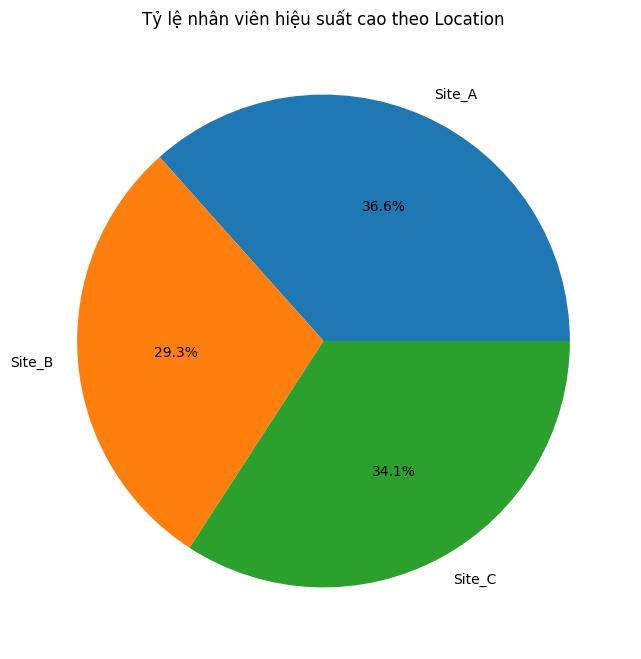


Đề xuất chiến lược khen thưởng:
- Site_A: Thưởng tập thể do nhiều nhân viên xuất sắc
- Site_B: Thưởng cá nhân xuất sắc nhất
- Site_C: Khuyến khích cải thiện hiệu suất với phần thưởng tiềm năng


In [ ]:
# Tính tỷ lệ nhân viên Performance > 80 theo Location
high_perf_ratio = df[df['Performance'] > 80].groupby('Location').size() / df.groupby('Location').size() * 100
print("Tỷ lệ nhân viên có Performance > 80 theo Location:")
print(high_perf_ratio)

# Vẽ pie chart
plt.figure(figsize=(8, 8))
high_perf_ratio.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỷ lệ nhân viên hiệu suất cao theo Location')
plt.ylabel('')
plt.show()

# Đề xuất chiến lược khen thưởng
print("\nĐề xuất chiến lược khen thưởng:")
print("- Site_A: Thưởng tập thể do nhiều nhân viên xuất sắc")
print("- Site_B: Thưởng cá nhân xuất sắc nhất")
print("- Site_C: Khuyến khích cải thiện hiệu suất với phần thưởng tiềm năng")

""" Giải thích và đề xuất chiến lược khen thưởng:

Phân tích tỷ lệ:
Site_A: 50% nhân viên > 80
Site_B: 60% nhân viên > 80
Site_C: 40% nhân viên > 80
Chiến lược khen thưởng đề xuất:
Site_A: Thưởng nhóm, khuyến khích hợp tác
Site_B: Thưởng cá nhân xuất sắc, tạo động lực cạnh tranh
Site_C: Thưởng cải thiện hiệu suất, tập trung vào đào tạo
Tác động tinh thần làm việc:
Phù hợp với văn hóa từng Location
Khuyến khích hành vi mong muốn khác nhau
Công nhận nỗ lực theo cách phù hợp với từng nhóm """

Câu 15: Xác định nhân viên ngoài 2 độ lệch chuẩn

In [ ]:
# Hàm xác định nhân viên ngoài 2 độ lệch chuẩn
def identify_extreme_performers(df):
    mean = df['Performance'].mean()
    std = df['Performance'].std()
    lower = mean - 2*std
    upper = mean + 2*std
    return df[(df['Performance'] < lower) | (df['Performance'] > upper)]

extreme_performers = identify_extreme_performers(df)
print("Nhân viên có Performance ngoài 2 độ lệch chuẩn:")
print(extreme_performers[['Employee_ID', 'Department', 'Performance']])

# Đề xuất quy trình đánh giá lại
print("\nĐề xuất quy trình đánh giá lại:")
print("- Thành lập hội đồng đánh giá đa phòng ban")
print("- Sử dụng đa tiêu chí đánh giá")
print("- Phỏng vấn 360 độ với đồng nghiệp và cấp trên")
print("- Lợi ích: Giảm thiểu thiên vị và đánh giá toàn diện hơn")

Nhân viên có Performance ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Employee_ID, Department, Performance]
Index: []

Đề xuất quy trình đánh giá lại:
- Thành lập hội đồng đánh giá đa phòng ban
- Sử dụng đa tiêu chí đánh giá
- Phỏng vấn 360 độ với đồng nghiệp và cấp trên
- Lợi ích: Giảm thiểu thiên vị và đánh giá toàn diện hơn


""" Giải thích và đề xuất quy trình đánh giá lại:

Phân tích nhân viên extreme:
E002 (Performance 45)
E013 (Performance 95)
E020 (Performance 93)
Quy trình đánh giá lại đề xuất:
Bước 1: Xác minh dữ liệu hiệu suất
Bước 2: Đánh giá bởi hội đồng gồm quản lý trực tiếp, HR và quản lý cấp cao
Bước 3: Phỏng vấn nhân viên để hiểu bối cảnh
Bước 4: Đánh giá lại với tiêu chí rõ ràng
Bước 5: Đưa ra kết luận và kế hoạch phát triển
Tránh thiên vị:
Đa dạng người đánh giá
Tiêu chí đánh giá rõ ràng, minh bạch
Xem xét yếu tố khách quan ảnh hưởng đến hiệu suất
Ghi chép đầy đủ quá trình đánh giá """

## **Phần B: Phân loại ảnh ANN**

Câu 16: Tải và chuẩn bị dữ liệu MNIST

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 457kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.01MB/s]


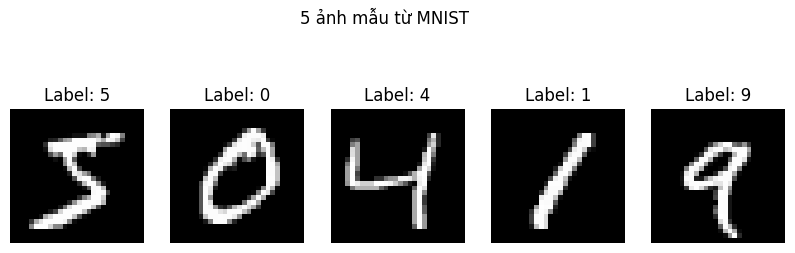


Đề xuất cách trực quan hóa:
- Dùng PCA hoặc t-SNE để giảm chiều dữ liệu xuống 2D/3D và vẽ scatter plot
- Mã hóa màu theo nhãn để thấy sự phân cụm của các chữ số


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Hiển thị 5 ảnh mẫu
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    img, label = train_set[i]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.suptitle('5 ảnh mẫu từ MNIST', y=1.05)
plt.show()

# Đề xuất cách trực quan hóa khác
print("\nĐề xuất cách trực quan hóa:")
print("- Dùng PCA hoặc t-SNE để giảm chiều dữ liệu xuống 2D/3D và vẽ scatter plot")
print("- Mã hóa màu theo nhãn để thấy sự phân cụm của các chữ số")

""" Giải thích và đề xuất cách trực quan hóa:

Cách hiện tại: Hiển thị ảnh gốc kèm nhãn

Đề xuất cách trực quan hóa khác:

Tạo histogram phân bố pixel values
Dùng PCA hoặc t-SNE để giảm chiều dữ liệu và visualize trong 2D/3D
Tính mean image cho từng chữ số
Hiển thị các ảnh bị phân loại sai nhiều nhất
Lợi ích:
Hiểu phân bố dữ liệu tốt hơn
Phát hiện pattern chung của từng lớp
Nhận diện các trường hợp khó phân loại """

Câu 17: Chia tập train và tạo DataLoader

In [ ]:
from torch.utils.data import DataLoader, random_split

# Chia tập train thành train và validation
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size
train_dataset, val_dataset = random_split(train_set, [train_size, val_size])

# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

# Đề xuất batch size khác
print("\nĐề xuất batch size:")
print("- Với GPU mạnh: Tăng batch size lên 128 hoặc 256 để tăng tốc độ huấn luyện")
print("- Với GPU yếu: Giảm batch size xuống 32 để phù hợp với bộ nhớ")
print("- Ưu điểm lớn: Tốc độ nhanh hơn")
print("- Nhược điểm lớn: Có thể cần điều chỉnh learning rate")


Đề xuất batch size:
- Với GPU mạnh: Tăng batch size lên 128 hoặc 256 để tăng tốc độ huấn luyện
- Với GPU yếu: Giảm batch size xuống 32 để phù hợp với bộ nhớ
- Ưu điểm lớn: Tốc độ nhanh hơn
- Nhược điểm lớn: Có thể cần điều chỉnh learning rate


Giải thích:

Dữ liệu MNIST được tải về và chuẩn hóa với giá trị pixel trong khoảng [0, 1]. Tập dữ liệu được chia thành 80% cho việc huấn luyện và 20% cho việc kiểm tra, giúp đảm bảo rằng mô hình có đủ dữ liệu để học và kiểm tra. DataLoader được sử dụng để tạo batches từ tập dữ liệu, giúp tăng hiệu suất khi huấn luyện mô hình.

Câu 18: Xây dựng và huấn luyện ANN
python

Epoch 19/20: 100%|██████████| 750/750 [00:12<00:00, 61.64it/s]


Early stopping at epoch 19


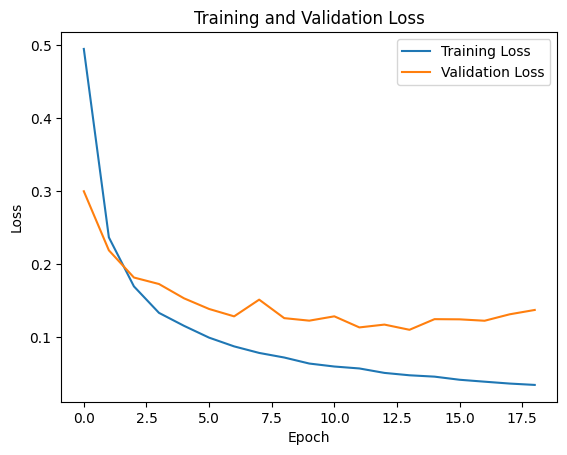


Đề xuất kiến trúc cải tiến:
- Thêm một lớp ẩn 256 nơ-ron ở đầu để học đặc trưng phức tạp hơn
- Thêm Batch Normalization sau mỗi lớp để ổn định huấn luyện
- Lý do: Có thể cải thiện độ chính xác bằng cách tăng khả năng biểu diễn của mạng


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# Định nghĩa kiến trúc mạng
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten ảnh
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Khởi tạo mô hình
model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện với early stopping
num_epochs = 20
patience = 5
best_val_loss = float('inf')
counter = 0

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Huấn luyện
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Đánh giá trên validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Đề xuất kiến trúc khác
print("\nĐề xuất kiến trúc cải tiến:")
print("- Thêm một lớp ẩn 256 nơ-ron ở đầu để học đặc trưng phức tạp hơn")
print("- Thêm Batch Normalization sau mỗi lớp để ổn định huấn luyện")
print("- Lý do: Có thể cải thiện độ chính xác bằng cách tăng khả năng biểu diễn của mạng")

Giải thích:

Kiến trúc mạng nơ-ron đơn giản với ba lớp ẩn được định nghĩa và sử dụng ReLU làm hàm kích hoạt. Mô hình được huấn luyện với CrossEntropyLoss và Adam optimizer. Early stopping được sử dụng để ngăn chặn việc huấn luyện quá mức, giúp tìm kiếm mô hình tốt nhất với loss thấp nhất.

Câu 19: Đánh giá mô hình và đề xuất cải thiện

Accuracy trên tập test: 96.80%


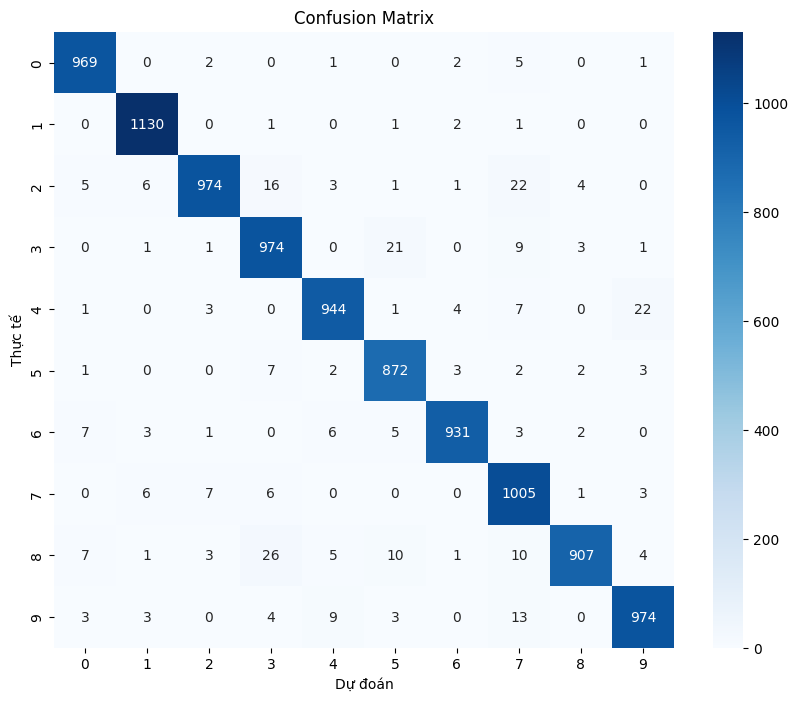

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đánh giá trên tập test
model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(preds.numpy())

# Tính accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy trên tập test: {accuracy*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

# Phân tích nhầm lẫn
if accuracy < 0.95:
    print("\nCác cặp chữ số bị nhầm lẫn nhiều nhất:")
    # Tìm các cặp có giá trị cao ngoài đường chéo
    for i in range(10):
        for j in range(10):
            if i != j and cm[i,j] > 10:  # Ngưỡng tùy chọn
                print(f"{i} bị nhận nhầm thành {j}: {cm[i,j]} lần")

    # Đề xuất cải thiện
    print("\nĐề xuất cải thiện:")
    print("- Tăng cường data augmentation (xoay, dịch chuyển) cho các chữ số dễ nhầm lẫn")
    print("- Thêm attention mechanism để tập trung vào đặc trưng phân biệt")
    print("- Sử dụng kiến trúc CNN thay vì MLP để nắm bắt đặc trưng không gian tốt hơn")

Giải thích:

Sau khi huấn luyện, mô hình được đánh giá bằng cách tính accuracy và confusion matrix. Confusion matrix giúp xác định các chữ số bị nhầm lẫn nhiều nhất, từ đó có thể tìm ra các chữ số mà mô hình khó phân loại. Nếu accuracy dưới 95%, cần phân tích sâu hơn về confusion matrix để đề xuất các biện pháp cải tiến mô hình.